# MNIST image recognition

In [1]:
# Import the modules
import numpy as np
import cv2
#import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Aislamiento de trazos

(3264, 2448, 3)


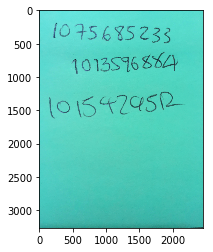

In [22]:
im = cv2.imread("./images/prueba5.jpg")
print(im.shape)
plt.imshow(im, cmap='gray')
#plt.show()


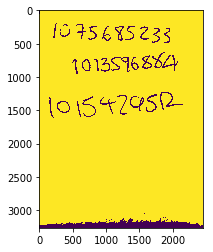

In [29]:
# simple_thresholding
blurred = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(blurred, (5, 5), 0)
(T, thresh) = cv2.threshold(blurred, 160, 220, cv2.THRESH_BINARY)
plt.imshow(thresh)

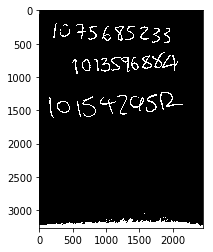

In [30]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
#plt.imshow(im_gray)
im_gray = thresh
plt.imshow(thresh, cmap='Greys')

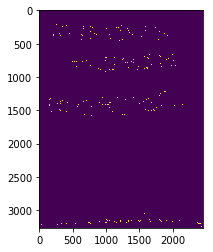

In [31]:
# Blurred
edged = cv2.Canny(im_gray, 100, 100)
plt.imshow(edged)

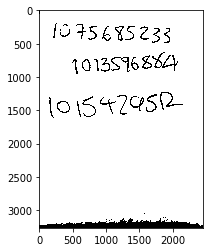

In [32]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im_th, cmap='Greys')

In [33]:
# Find contours in the image
_, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [34]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
print(rects)

[(2435, 3214, 13, 16), (57, 3213, 7, 3), (2444, 3207, 4, 5), (63, 3205, 4, 3), (2446, 3202, 2, 4), (128, 3201, 11, 7), (2447, 3200, 1, 1), (320, 3199, 4, 3), (328, 3198, 1, 1), (251, 3198, 2, 2), (2402, 3197, 15, 12), (2281, 3197, 6, 3), (267, 3197, 2, 4), (2416, 3195, 3, 3), (2272, 3193, 3, 6), (261, 3193, 3, 7), (2419, 3192, 21, 18), (2422, 3192, 1, 1), (2441, 3189, 7, 3), (2333, 3189, 3, 4), (2296, 3185, 4, 3), (401, 3185, 7, 6), (2328, 3183, 3, 4), (2224, 3181, 2, 3), (1032, 3181, 1, 3), (882, 3180, 4, 5), (738, 3180, 4, 5), (2366, 3179, 3, 4), (2333, 3179, 3, 3), (827, 3177, 2, 2), (1074, 3176, 3, 2), (1035, 3176, 2, 3), (600, 3176, 5, 7), (587, 3176, 3, 4), (2239, 3175, 22, 17), (870, 3175, 2, 3), (2361, 3173, 5, 4), (2258, 3172, 3, 4), (1001, 3171, 3, 2), (632, 3171, 8, 3), (1330, 3170, 4, 4), (893, 3169, 4, 6), (737, 3169, 1, 1), (728, 3169, 1, 1), (2368, 3168, 2, 2), (1172, 3168, 4, 8), (1024, 3168, 8, 8), (595, 3168, 2, 3), (1652, 3167, 5, 3), (1957, 3166, 2, 3), (2133, 3165,

In [35]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    #roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)


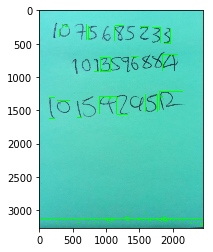

In [36]:
plt.imshow(im)

In [37]:
## Guarda resultados
cv2.imwrite('./results/res_p5.png',im)

True

## Predicciones

...